<font size="5">Section 2: non linear models</font>

### Housekeeping

#### import libraries

Pandas for data management, statsmodels, numpy and sklearn for analysis, matplotlib for visualization. Other libraries as needed for specific tasks (e.g. semopy for SEM). Remember to use the bash terminal or the enviroment manager to add libraries.

#### read data

Read data files using pandas as noted below. We can clean and organize data in many ways (for example, using the **dropna** command over a dataset).

#### describe data

There are many was to analyze data and do descriptive statistics. A good command to start is ***head***, to describe a section of the data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
import scipy 

%matplotlib inline

In [2]:
# higher ed data
cned = pd.read_csv('../data/cned.csv')
cned.dropna(inplace=True)

In [7]:
cned.reset_index(drop=True, inplace=True)
cned.head()

,region,idc,puntaje,nem,ingreso2,vacantes,ingreso,year,stem,area
0,7,7404,713.0,645.0,26.0,38.0,138,2019,0,Art/Humanities
1,7,7405,643.0,637.0,28.0,39.0,104,2019,0,Art/Humanities
2,7,7402,674.0,692.0,278.0,314.0,1318,2019,0,Art/Humanities
3,7,7406,663.0,655.0,79.0,103.0,438,2019,0,Art/Humanities
4,7,7408,642.0,610.0,41.0,59.0,148,2019,0,Art/Humanities


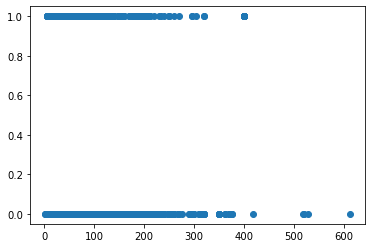

In [12]:
plt.scatter(cned['vacantes'],cned['stem'])

### OLS

We can use statsmodels to estimate a simple OLS regression (linear probability model). 

In [10]:
y=cned['stem']
X=cned[['puntaje','nem','vacantes','year']]
X=sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   stem   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.016
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           0.000490
Time:                        14:47:41   Log-Likelihood:                -5919.4
No. Observations:                9065   AIC:                         1.185e+04
Df Residuals:                    9060   BIC:                         1.188e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9501      4.999      1.990      0.0

### Probit



In [11]:
model = sm.Probit(y, X)
probit_model = model.fit()
print(probit_model.summary())

mfx = probit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.623654
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                   stem   No. Observations:                 9065
Model:                         Probit   Df Residuals:                     9060
Method:                           MLE   Df Model:                            4
Date:                Thu, 21 Jul 2022   Pseudo R-squ.:                0.001818
Time:                        22:34:51   Log-Likelihood:                -5653.4
converged:                       True   LL-Null:                       -5663.7
Covariance Type:            nonrobust   LLR p-value:                 0.0003804
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.6035     14.039      1.895      0.058      -0.912      54.119
puntaje        0.0010      0.

### Logit

In [12]:
model = sm.Logit(y, X)
logit_model = model.fit()
print(logit_model.summary())

mfx = logit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.623656
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   stem   No. Observations:                 9065
Model:                          Logit   Df Residuals:                     9060
Method:                           MLE   Df Model:                            4
Date:                Thu, 21 Jul 2022   Pseudo R-squ.:                0.001816
Time:                        22:34:57   Log-Likelihood:                -5653.4
converged:                       True   LL-Null:                       -5663.7
Covariance Type:            nonrobust   LLR p-value:                 0.0003859
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.8868     23.134      1.897      0.058      -1.455      89.229
puntaje        0.0015      0.

### Poisson

In [32]:
from sklearn import linear_model
poisson = linear_model.PoissonRegressor()

subset=cned.loc[cned['ingreso']<100]
y=subset['ingreso']
X=subset[['puntaje','nem','vacantes','year']]
poisson.fit(X, y)
poisson.coef_


array([-3.69681979e-05, -1.44322476e-04,  6.55270509e-03, -4.53041362e-05])

<font size="3">**Homework**</font>

Load junaeb.csv dataset, clean data and produce descriptive statistics

Run OLS on the probability of fathers living at home
 
Run Probit on the probability of fathers living at home

Run Logit on the probability of fathers living at home

Discuss the results of the different probability models

Run Poisson on the number of household members (n_personas)